Data Pre-Processing/ SetUp

In [168]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os
import datetime
import numpy as np
import seaborn as sns

In [169]:
# Set up the file path for the input Excel file
file_path = '/Users/paraggupta/Desktop/projects/TVD_Associates/Data/Dataset_Full.xlsx'

# Read the Excel file into a DataFrame
data = pd.read_excel(file_path)

In [170]:
# Identify and convert numeric columns to numeric data type
numeric_cols = ['Amount Paid', 'Balance']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [171]:
# Convert the 'Date Registered' column to datetime
data['Date Registered'] = pd.to_datetime(data['Date Registered'], errors='coerce')
#Calculate the nimber of day since
data['Days_Registered'] = (datetime.datetime.today() - data['Date Registered']).dt.days

In [172]:
#grouping together zipcodes
zip_series = pd.Series(data['Address Main | Zip'])
zip_count = zip_series.value_counts()

#A DICTIONARY of all the zipcodes and of all their counts
zip_code_dict = dict(zip(zip_count.index, zip_count.values))

In [173]:
#Chnaging the values of the zip-code to the their counts
data['Address Main | Zip'] = data['Address Main | Zip'].apply(lambda x: zip_code_dict.get(x, 0))
data['Address Main | Zip']

0      5
1      1
2      1
3      1
4      1
      ..
384    1
385    3
386    2
387    2
388    2
Name: Address Main | Zip, Length: 389, dtype: int64

In [174]:
#A DICTIONARY of all the Member Type and of all their Associated weights
member_type_dict = {'Member Contact': 0,'Prospect': 1,'Individual Member': 2,'Lifetime Member': 3}
data['Member Type'] = data['Member Type'].apply(lambda x: member_type_dict[x])
data['Member Type']

0      0
1      0
2      0
3      1
4      2
      ..
384    0
385    0
386    2
387    1
388    1
Name: Member Type, Length: 389, dtype: int64

In [175]:
#data['Discount Code'] = data['Discount Code'].apply(lambda x: 1 if isinstance(x,str) else 0) 
#Making Opt out a discrete column 
data['Opt out'] = data['Opt out'].apply(lambda x: 1 if isinstance(x,str) else 0)


In [176]:
#Make Museum column a discrete column
data['Museum'] = data['Museum'].apply(lambda x: 1 if isinstance(x,str) else 0)

In [177]:
#Make Discount Code column a discrete column
data['Discount Code'] = data['Discount Code'].apply(lambda x: 1 if isinstance(x,str) else 0)
data

,Date Registered,Submission ID,Status,Member Type,Registered By,Discount Code,User ID,Registrant Name | Prefix,Registrant Name | First,Registrant Name | Middle,...,Museum,Museum-Guest-1,Museum-Guest-2,PD,ADA-Dietary,ADA-Dietary(2),Opt out,Amount Paid,Balance,Days_Registered
0,2022-07-30 18:58:40,206660822,Registered,0,Rose Dolin,0,2011272045,NaN,Breone,NaN,...,0,NaN,NaN,No,No,NaN,0,0.0,0,628
1,2022-03-31 17:52:53,206014882,Registered,0,Beth Alden,1,2004099504,NaN,Beth,NaN,...,0,NaN,NaN,Yes,No,NaN,0,370.0,0,749
2,2022-05-23 16:50:22,206321207,Registered,0,Keren Allen,0,2004097280,NaN,Keren,NaN,...,1,NaN,NaN,No,No,NaN,1,435.0,0,696
3,2022-06-08 10:31:35,206401712,Registered,1,Melyssa Allen,0,2010978409,NaN,Susan,NaN,...,0,NaN,NaN,No,No,NaN,1,465.0,0,680
4,2022-03-31 14:04:49,206012261,Registered,2,Daniela Alvarez,0,2010388558,NaN,Daniela,NaN,...,0,NaN,NaN,Yes,No,NaN,0,395.0,0,749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2022-03-09 14:30:38,205871125,Registered,0,Mandy Zachgo,1,2006873264,NaN,Mandy,NaN,...,1,NaN,NaN,No,No,NaN,1,40.0,0,771
385,2022-03-31 15:23:34,206013245,Registered,0,Patricia Zehna,1,2006884575,NaN,Patricia,NaN,...,1,NaN,NaN,No,No,NaN,0,410.0,0,749
386,2022-05-27 17:12:55,206346327,Registered,2,Katrina Zwolinski,0,2010931186,NaN,Katrina,NaN,...,0,NaN,NaN,No,No,NaN,1,395.0,0,692
387,2022-07-06 11:30:38,206538977,Registered,1,norman scarbrough,0,2011162523,NaN,norman,NaN,...,0,NaN,NaN,No,No,NaN,0,0.0,0,652


Data Analysis

In [178]:
# Create a new column 'score' using a lambda function
data['score'] = data.apply(lambda row: row['Discount Code'] + row['Museum'] - row['Opt out']+0.01*row['Days_Registered']+0.001*row['Amount Paid']+row['Member Type']+0.1*row['Address Main | Zip'], axis=1)
data['score']

0       6.780
1       8.960
2       7.495
3       7.365
4       9.985
        ...  
384     8.850
385    10.200
386     8.515
387     7.720
388     7.720
Name: score, Length: 389, dtype: float64

In [179]:
#Scaling our Scores so that we have a mean of zero and a standard deviation of 1, for ease of analysis
scaler = StandardScaler()
data['score'] = scaler.fit_transform(data['score'].values.reshape(-1, 1))
data['score'] += 2

/var/folders/bj/pnpjngv10c56x2s0brvl85xc0000gn/T/ipykernel_21551/129068238.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['score'], shade=True)


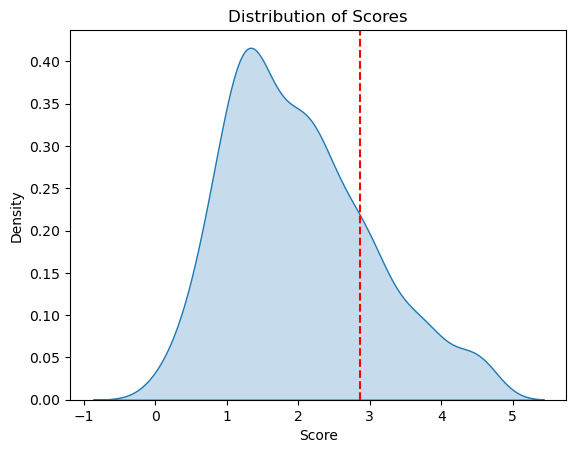

In [180]:
#visualize the distribution of the score We used a Kernel Density Estimation (KDE) Plot

#Kernel Density Estimation (KDE) Plot: A KDE plot is a smooth, continuous representation of the probability density function of a variable. It can help you visualize the overall shape of the distribution
#, including any potential multi-modality or skewness.

sns.kdeplot(data['score'], shade=True)

plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Density')

sorted_data = data['score'].sort_values()
twenty_percentile_value = sorted_data.quantile(0.8)
plt.axvline(x=twenty_percentile_value, color='r', linestyle='--')

plt.show()

The distribution is slightly SKEWED TO THE RIGHT,
Overall, this KDE plot suggests that the scores in the dataset are CONCENTRATED AROUND 2

scores above 3, are the top 20% of the most engaged members
Mean of 2
with max value of 4.5
with min value of 0.4
Range of 0,5


Saving Results

In [182]:
new_file_path = '/Users/paraggupta/Desktop/projects/TVD_Associates/Data/Final_Dataset_Full.xlsx'
data.to_excel(new_file_path, index=False)